In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from PIL import Image
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\xbxb\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# tokenize words

In [40]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [334]:
testingtext="non, none, pear, quickly, 我是, 很好, amigo, this is awesome! I'm not going to watch a play tonight. Let's play the ball "

In [335]:
words1 = word_tokenize(testingtext)
print(words1)

['non', ',', 'none', ',', 'pear', ',', 'quickly', ',', '我是', ',', '很好', ',', 'amigo', ',', 'this', 'is', 'awesome', '!', 'I', "'m", 'not', 'going', 'to', 'watch', 'a', 'play', 'tonight', '.', 'Let', "'s", 'play', 'the', 'ball']


after tokenize the text file, punctuation will be sepeartated from string, words will be seperated based on space. so words1 become a list that contains several string value

# remove non-english words and punctuation and stopwords

use nltk library, import englishwords

In [336]:
englishwords=set(nltk.corpus.words.words())

rmeove all punctuation, non english words from the text

In [337]:
#nonpunc_comment=[x for x in words1 if x in englishwords and x not in STOPWORDS]
nonpunc_comment=[x for x in words1 if x in englishwords]
print(nonpunc_comment)

['non', 'none', 'pear', 'quickly', 'this', 'is', 'awesome', 'I', 'not', 'going', 'to', 'watch', 'a', 'play', 'tonight', 'play', 'the', 'ball']


# tag the type of words

In [338]:
print(nltk.pos_tag(nonpunc_comment))

[('non', 'RB'), ('none', 'NN'), ('pear', 'JJ'), ('quickly', 'RB'), ('this', 'DT'), ('is', 'VBZ'), ('awesome', 'JJ'), ('I', 'PRP'), ('not', 'RB'), ('going', 'VBG'), ('to', 'TO'), ('watch', 'VB'), ('a', 'DT'), ('play', 'NN'), ('tonight', 'NN'), ('play', 'VBP'), ('the', 'DT'), ('ball', 'NN')]


In [173]:
tags=nltk.pos_tag(nonpunc_comment)

the tags will store the types of different words
```
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
```

# detect adjective and adverb words

In [120]:
for i in range(0,len(nonpunc_comment)):
    if tags[i][1] not in ["JJ","JJR","JJS","RB","RBR","RBS"]:
               nonpunc_comment.remove(tags[i][0])


# detect verb words

In [130]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xbxb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [174]:
for i in range(0,len(nonpunc_comment)):
       if tags[i][1] not in ["VB","VBD","VBG","VBN","VBP","VBZ"]:
               nonpunc_comment.remove(tags[i][0])

          

In [181]:
for i in range(0,len(nonpunc_comment)):
    nonpunc_comment[i]=wordnet_lemmatizer.lemmatize(nonpunc_comment[i], 'v')
print(nonpunc_comment)

['be', 'go', 'watch', 'play']


in this case, I used wordnet_limmatizer. This will convert the verb to its root form. Therefore, was->be going->go. The reason I appy lemmatizer to verb instead of adj/adv is that the superlative or comparlative form of adj/adv can reflect a sense of emotion from the authors of the comments.

# about words cloud

In [229]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [313]:
testdpd=pd.DataFrame(index=[1,2,3,4],columns=["a"])

In [314]:
testdpd["a"][1]=["apple","big","pear","banana"]
testdpd["a"][2]=["big","big","pear","pear"]
testdpd["a"][3]=["big","big","big","big"]
testdpd["a"][4]=["big","big","big","apple"]

testdpd will be used as an example to create wordcloud. I can put column "a" of testdpd directly to wordcloud. However, if you print testdpd["a"]:

In [315]:
testdpd["a"]

1    [apple, big, pear, banana]
2        [big, big, pear, pear]
3          [big, big, big, big]
4        [big, big, big, apple]
Name: a, dtype: object

words like dtyoe, object, name wil appear in the wordcloud. Therefore, I need to add these words to stopwords. I can add more words if I want.

In [316]:
stopwords = set(STOPWORDS)

In [320]:
stopwords.update(["dtype", "object", "name"])

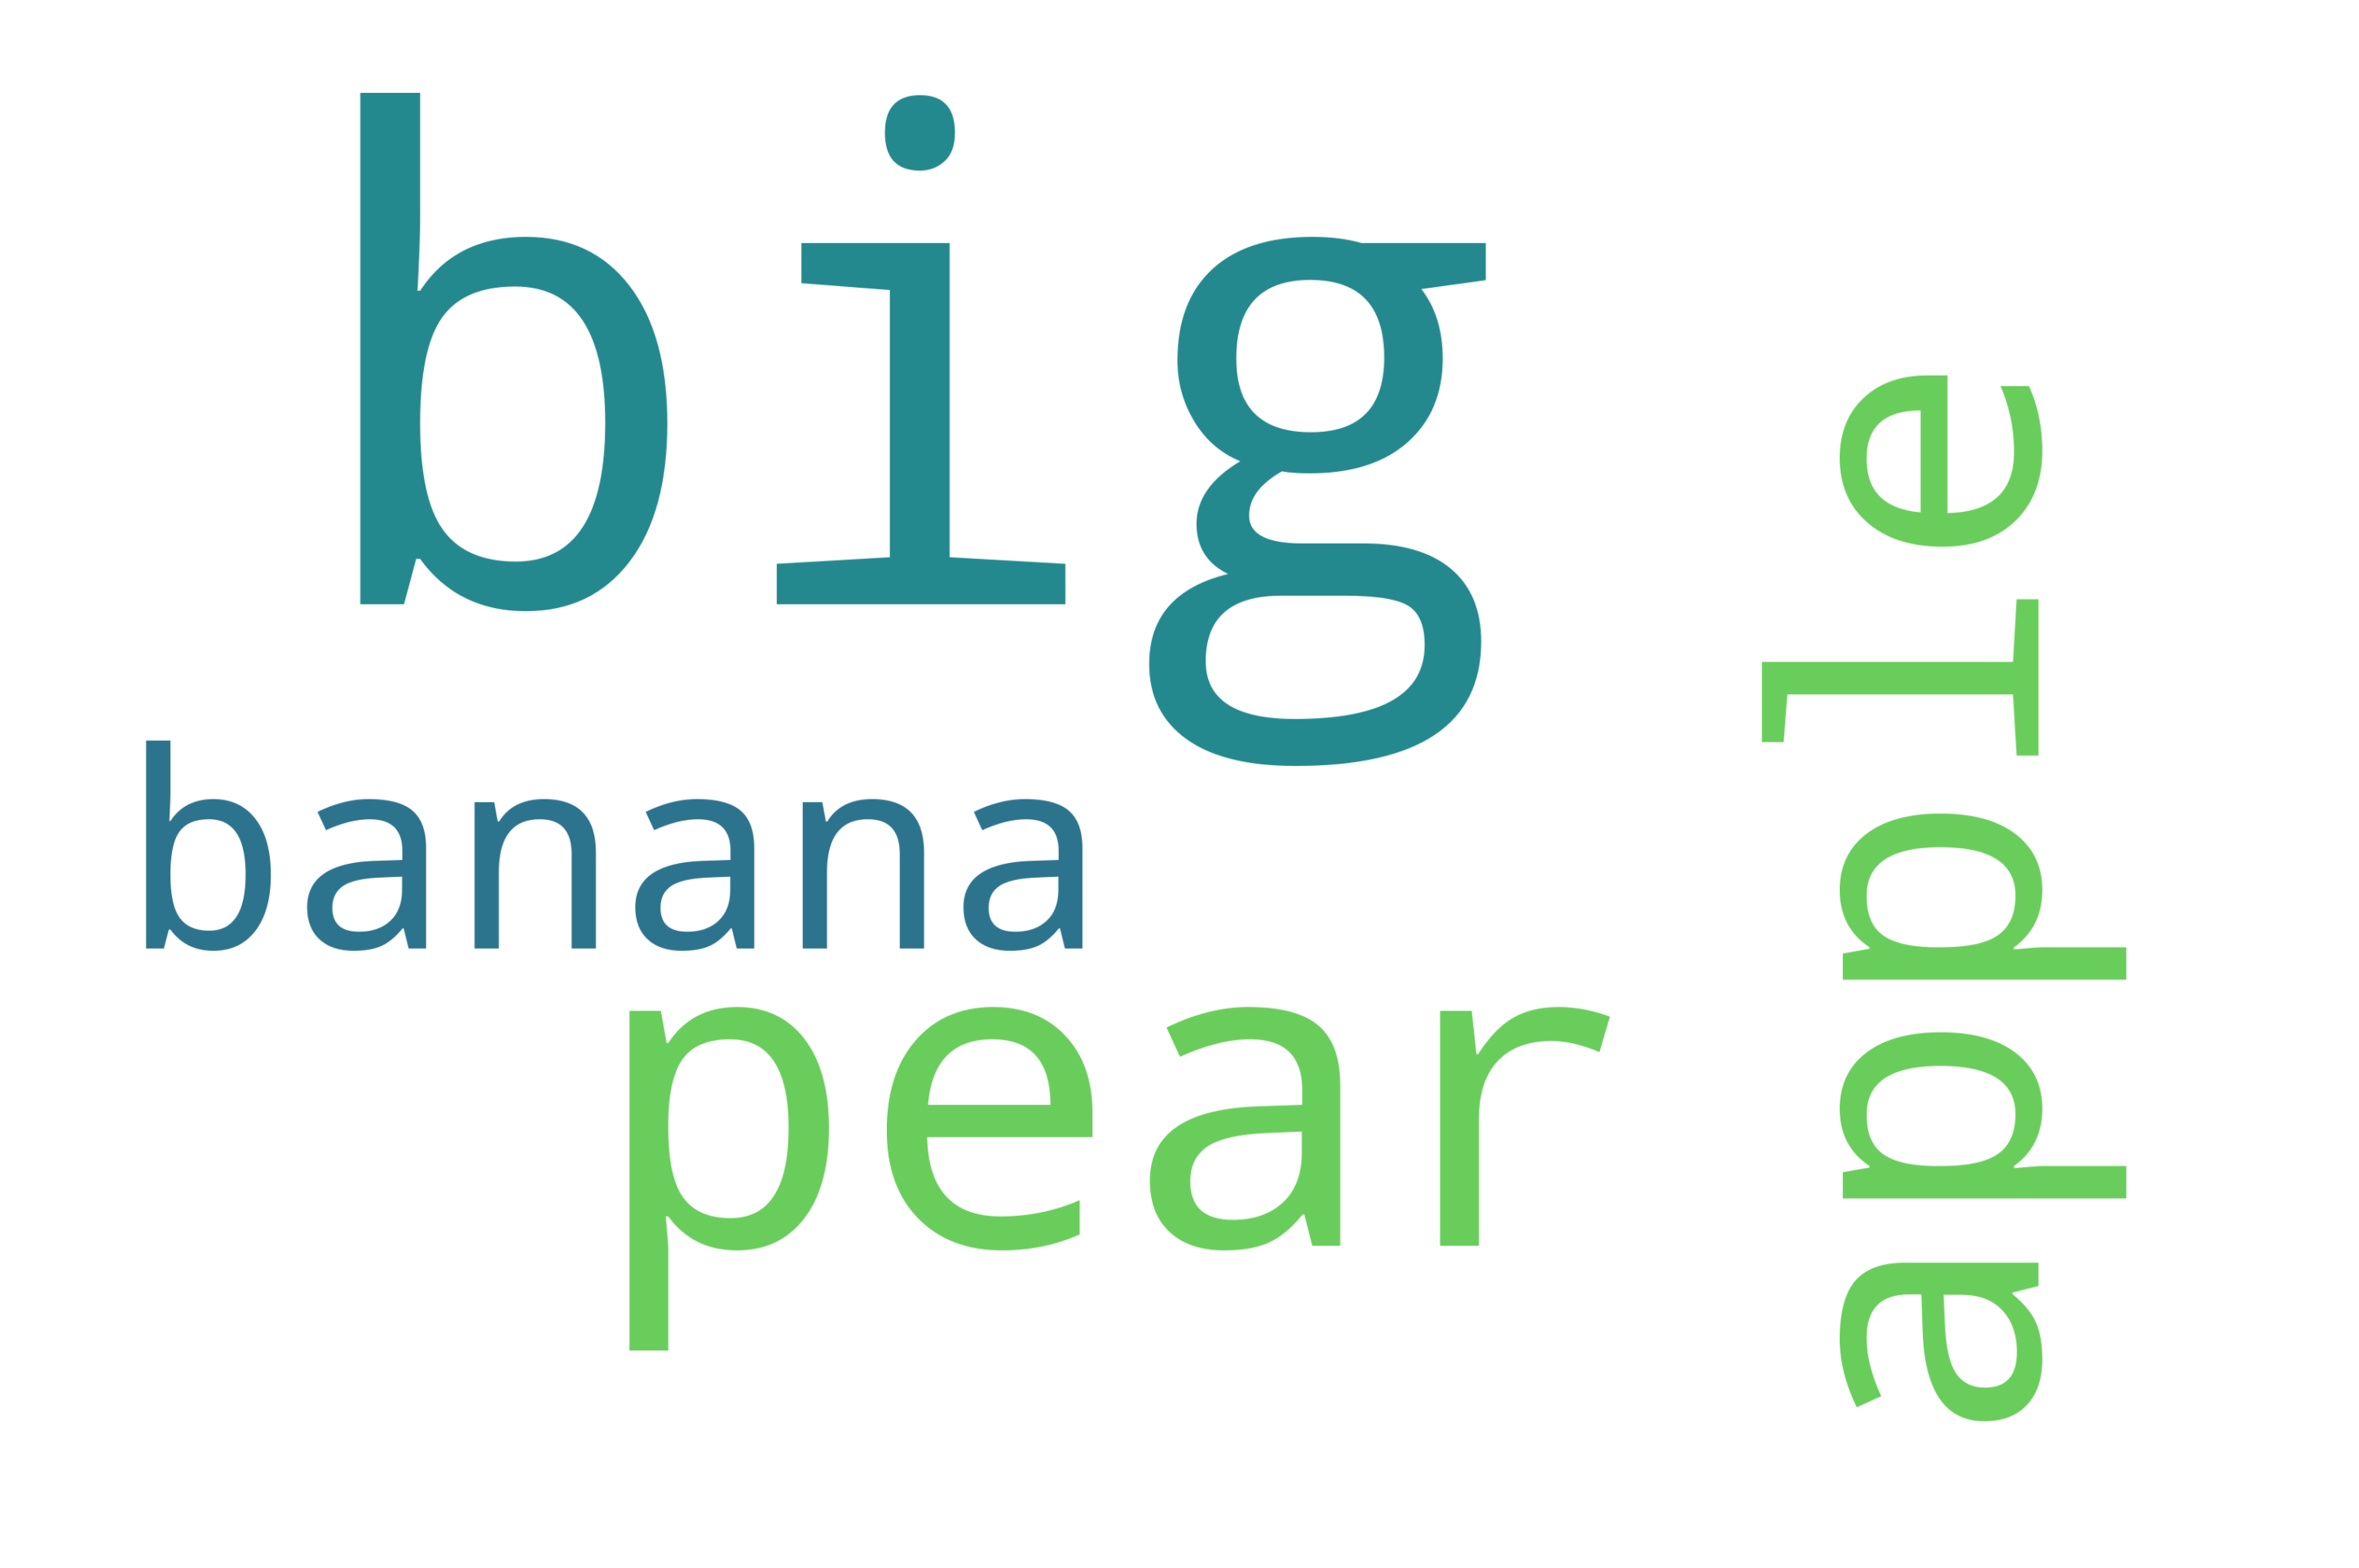

In [321]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = stopwords).generate(str(testdpd["a"]))
fig = plt.figure(figsize = (40, 30))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# countvectorized


In [280]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

countvectorizer only works for a list of string(or a column of string). not a column of lists that contains several string words. Therefore, we need to recombine them back

In [318]:
testdpd["a"]=[" ".join(review) for review in testdpd["a"].values]

countvectorizer

In [306]:
vectorizer=CountVectorizer()
testdpd_vec=vectorizer.fit_transform(testdpd['a'])

count the appearance of each word

In [322]:
sum_words = testdpd_vec.sum(axis=0)

In [324]:
words_freq = [(word, sum_words[0, idx]) for word, idx in     vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [327]:
words_freq[0:2]

[('big', 10), ('pear', 3)]

In [349]:
pd.DataFrame(data=words_freq)

,0,1
0,big,10
1,pear,3
2,apple,2
3,banana,1
